In [1]:
import sys

%load_ext autoreload

%autoreload 2

import river.cluster as rcluster
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from clustpy.partition import XMeans
from sklearn.cluster import KMeans, HDBSCAN
from dbhd_clustering.DBHDALGO import DBHD
from clustpy.metrics import unsupervised_clustering_accuracy, PairCountingScores
from river import metrics as rmetrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from evaluate import printMetrics 
from datahandler import load_data

from scipy.spatial import Voronoi, voronoi_plot_2d

(3031, 2)
3031


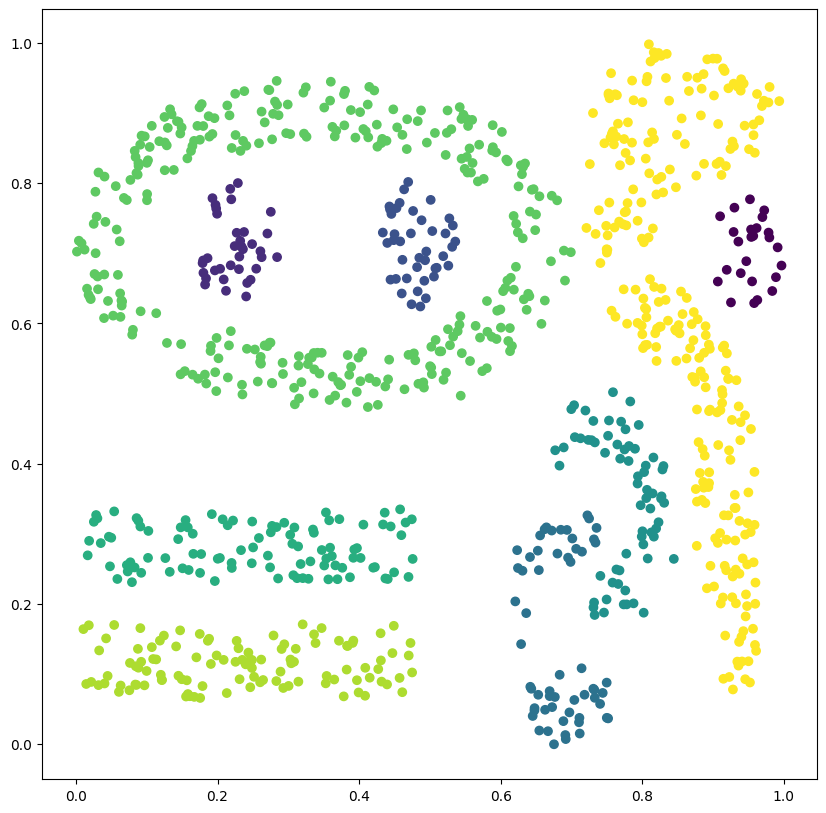

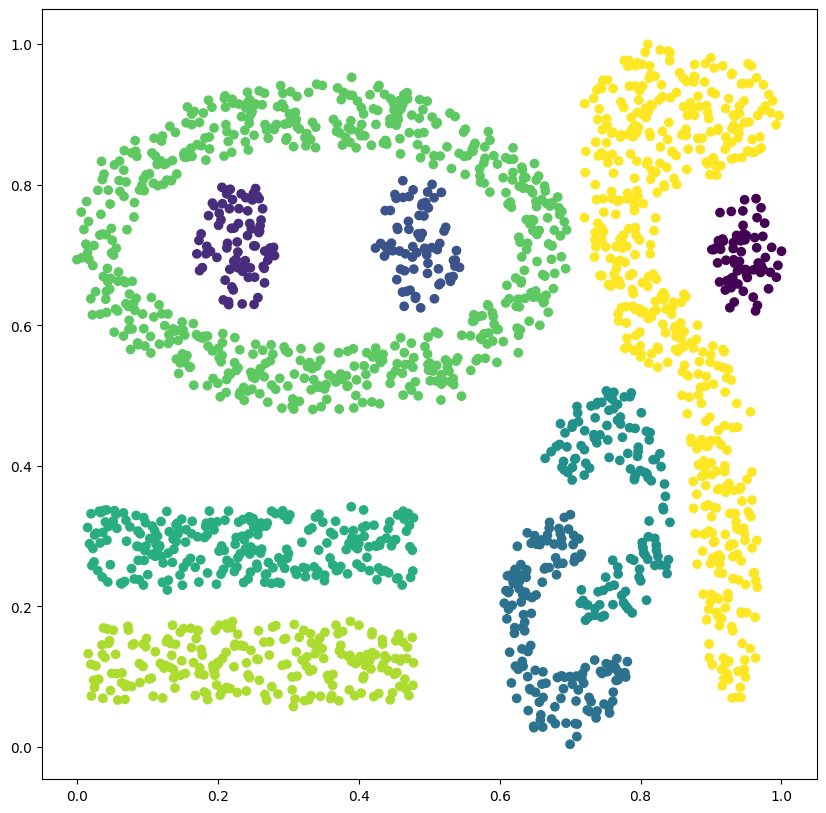

In [2]:
X, y = load_data("complex9", "artificial", 2)
print(X.shape)
print(len(y))
c = 1000
X_test = X[c:]
y_test = y[c:]
X = X[:c]
y = y[:c]
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

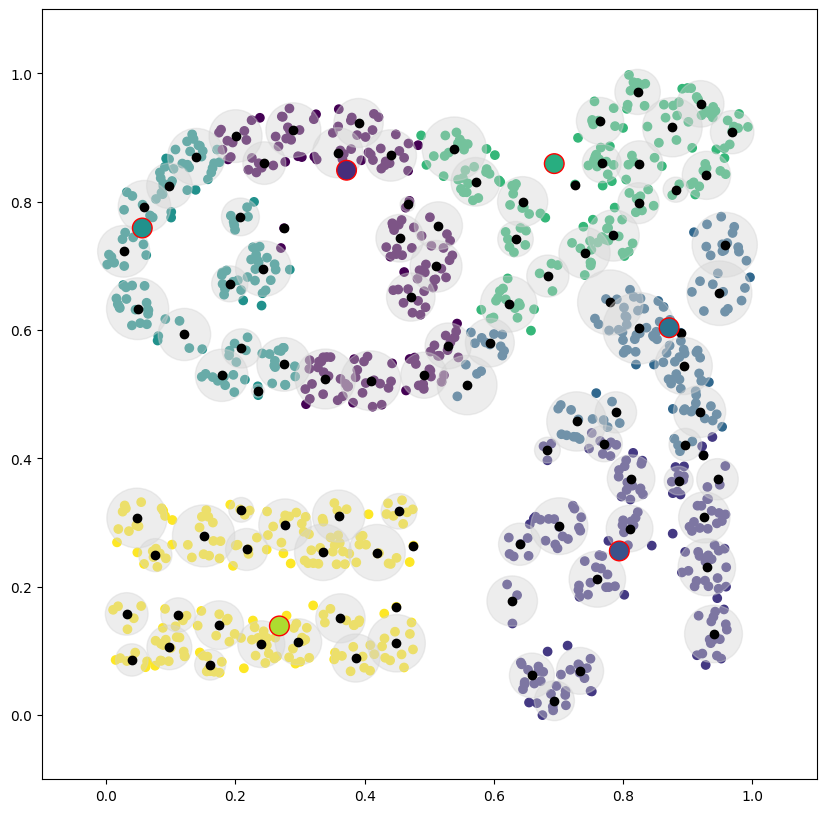

    0   1     2    3    4     5     6   7     8  
0   0     0    0   25     0     0   0     0   0  
1   0     2    0    0    34     0   0     0   0  
2   0    41    0    0     0     0   0     0   0  
3   0     0   59    0     0     0   0     0   0  
4   0     0   51   15     0     0   0     0   0  
5   0     0    0    0     0     0   0   100   0  
6   0   122    0   14   105    66   0     0   0  
7   0     0    0    0     0     0   0   108   0  
8   0     0   67   77     0   114   0     0   0  
Acc: 0.462 NMI: 0.5970311699077122 ARI: 0.34699267438474357 AMI: 0.5924438295153043 Pur.: 0.593 Prec.: 0.49682969946965233 Rec.: 0.4370399552136681 F1: 0.4650208485008935 Comp.: 0.612517502900259 Fowl.: 0.46597685522463134 Homo.: 0.5823086109428035 Clu.Num.: 6 True Clu.Num 9


In [3]:
from utils import dict_to_np, dps_to_np
from competitors.clustream import CluStream
clustream = CluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000)
for x in X:
	dp = dict(enumerate(x))
	clustream.learn_one(dp)
clustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = clustream.predict_one(dp, recluster=True)
	clustream_labels_train.append(pred)

#vor = Voronoi(dps_to_np(clustream.centers.values()))
clustream_centers = dps_to_np(clustream.centers.values())
plt.figure(figsize=(10, 10))
#voronoi_plot_2d(vor, show_vertices=False, show_points=False)
plt.scatter(X[:, 0], X[:, 1], c=clustream_labels_train)
for id, mc in clustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=clustream.centers.keys(), s= 200, edgecolors='red')
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
       
print(printMetrics(y, clustream_labels_train))

C:\Users\Philipp-LMU\Workspaces\streaming_clustream\venvClu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Philipp-LMU\Workspaces\streaming_clustream\venvClu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


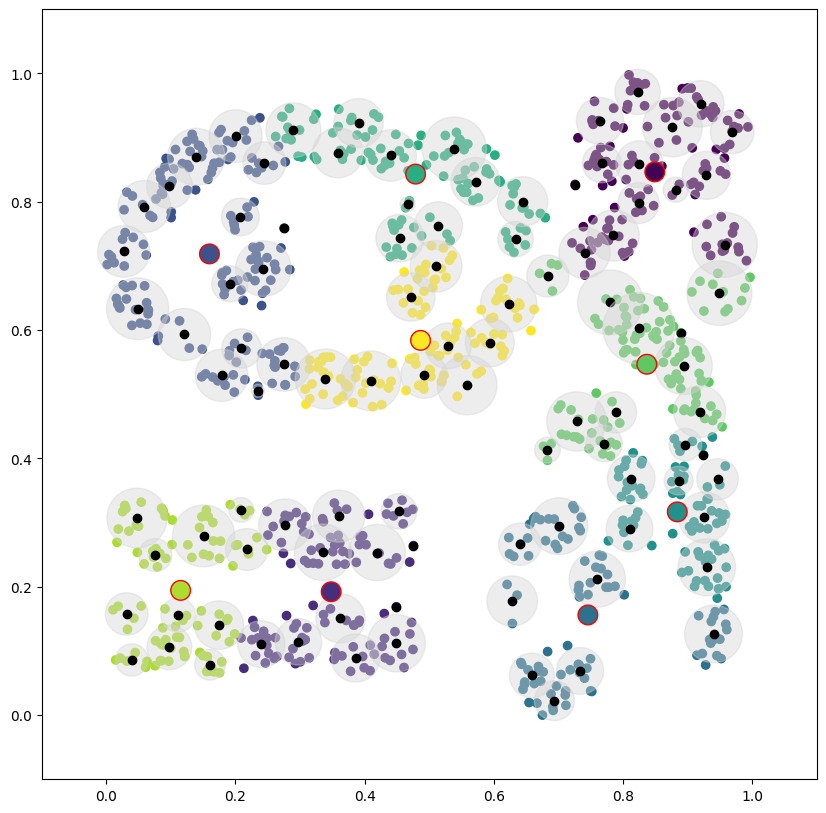

    0     1    2     3    4    5    6    7    8   
0    14    0     0    0    0    0   11    0    0  
1     0    0    36    0    0    0    0    0    0  
2     0    0     0    0    0   18    0    0   23  
3     0    0     0   59    0    0    0    0    0  
4     0    0     0   15   25    0   26    0    0  
5     0   54     0    0    0    0    0   46    0  
6     0    0   124    0    0   91    4    0   88  
7     0   60     0    0    0    0    0   48    0  
8   114    0     0   16   55    0   73    0    0  
Acc: 0.465 NMI: 0.6191406040517221 ARI: 0.36715672415063677 AMI: 0.6127440897855855 Pur.: 0.712 Prec.: 0.6150514347590688 Rec.: 0.36509154243297604 F1: 0.45819861431870673 Comp.: 0.5756276929921633 Fowl.: 0.47386715120569745 Homo.: 0.6697699249279763 Clu.Num.: 9 True Clu.Num 9


In [4]:
from competitors.clustream import CluStream
clustream2 = CluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000)
for x in X:
	dp = dict(enumerate(x))
	clustream2.learn_one(dp)
clustream2_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = clustream2.predict_one(dp, recluster=True, sklearn=True)
	clustream2_labels_train.append(pred)
    
clustream_centers = clustream2._kmeans.cluster_centers_
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=clustream2_labels_train)
for id, mc in clustream2.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
       
print(printMetrics(y, clustream2_labels_train))

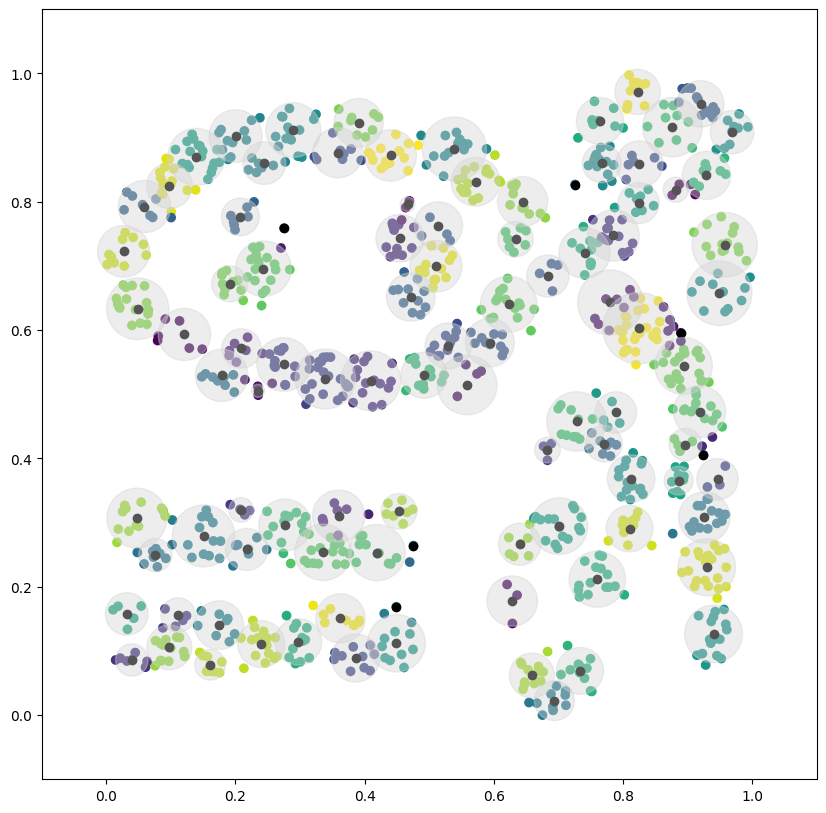

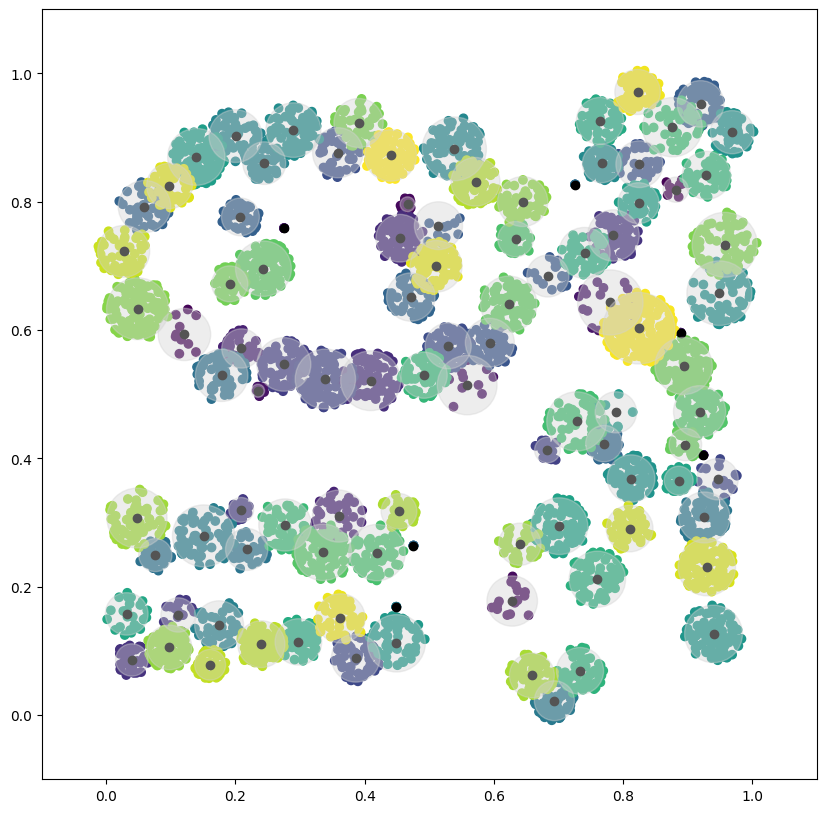

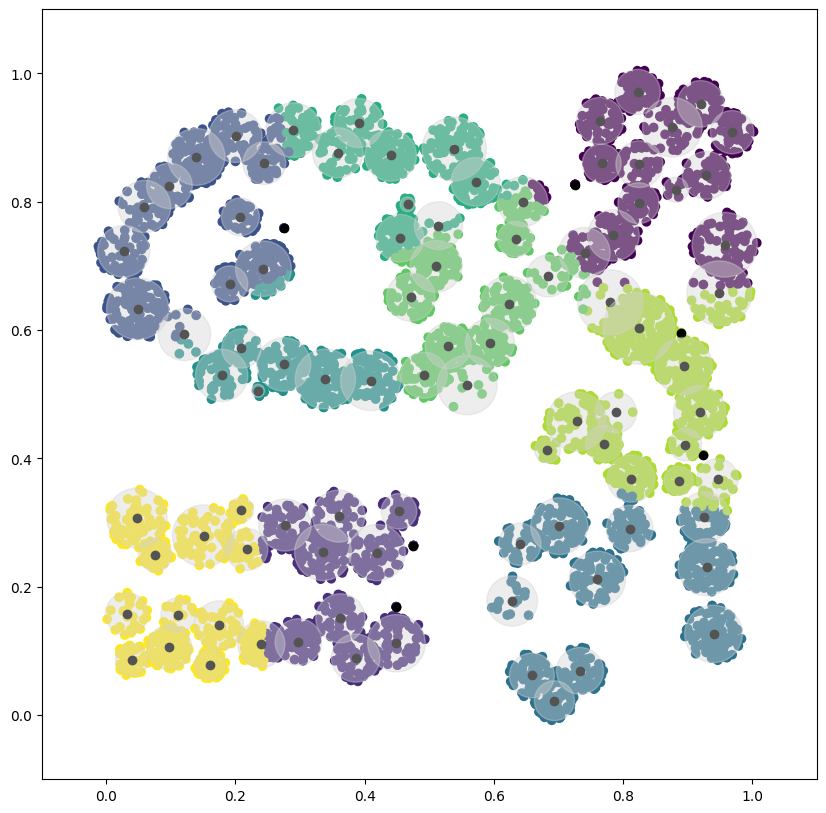

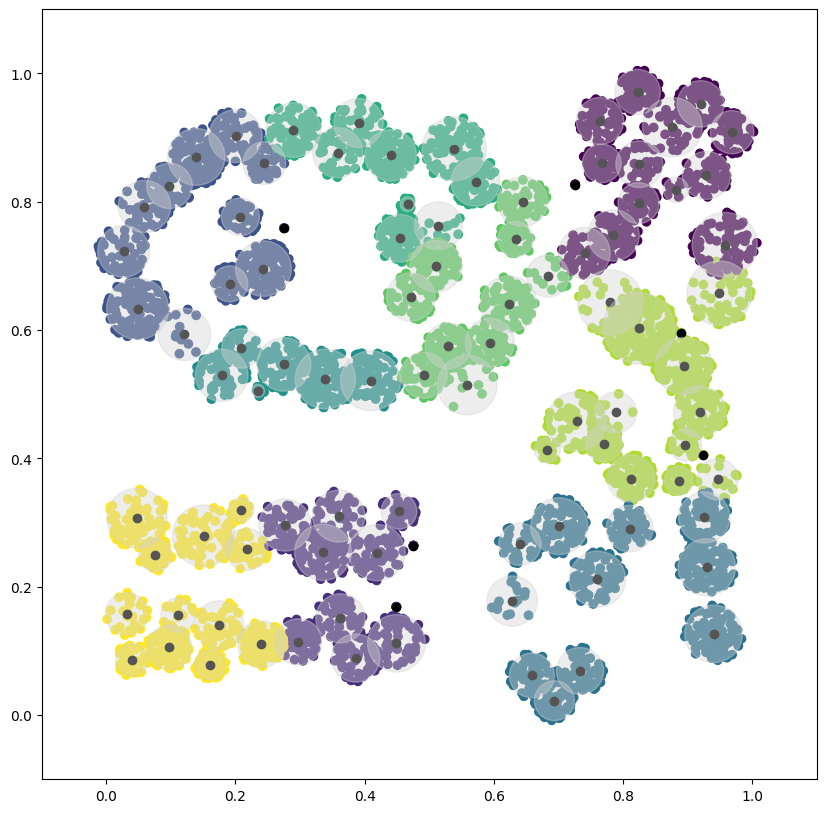

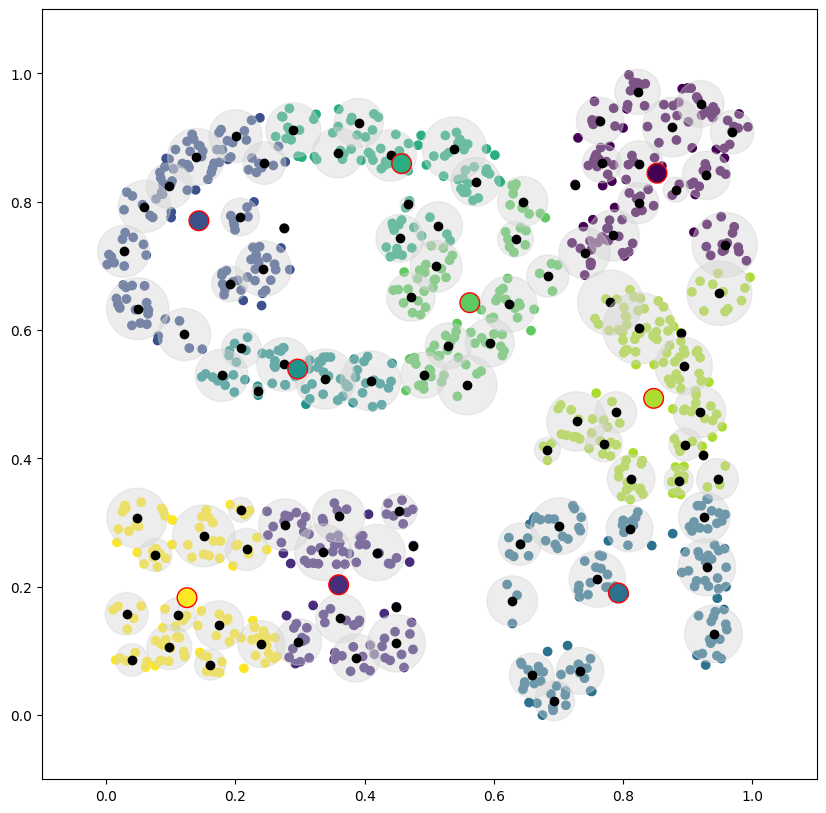

    0     1    2    3    4    5    6    7    8   
0    14    0    0    0    0    0    0   11    0  
1     0    0   36    0    0    0    0    0    0  
2     0    0    0    0    0   18   23    0    0  
3     0    0    0   59    0    0    0    0    0  
4     0    0    0   25    0    0    0   41    0  
5     0   54    0    0    0    0    0    0   46  
6     0    0   93    0   67   74   73    0    0  
7     0   43    0    0    0    0    0    0   65  
8   114    0    0   51    0    0    0   93    0  
Acc: 0.466 NMI: 0.6174887954869246 ARI: 0.33615748685768504 AMI: 0.611052152052734 Pur.: 0.692 Prec.: 0.5778040182680119 Rec.: 0.3449584275021253 F1: 0.43200363530137303 Comp.: 0.5746468237354578 Fowl.: 0.44645085456984246 Homo.: 0.6672334291329047 Clu.Num.: 9 True Clu.Num 9


In [5]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000, offline_datascale=5000)
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
clustream_centers = genclustream.centers
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

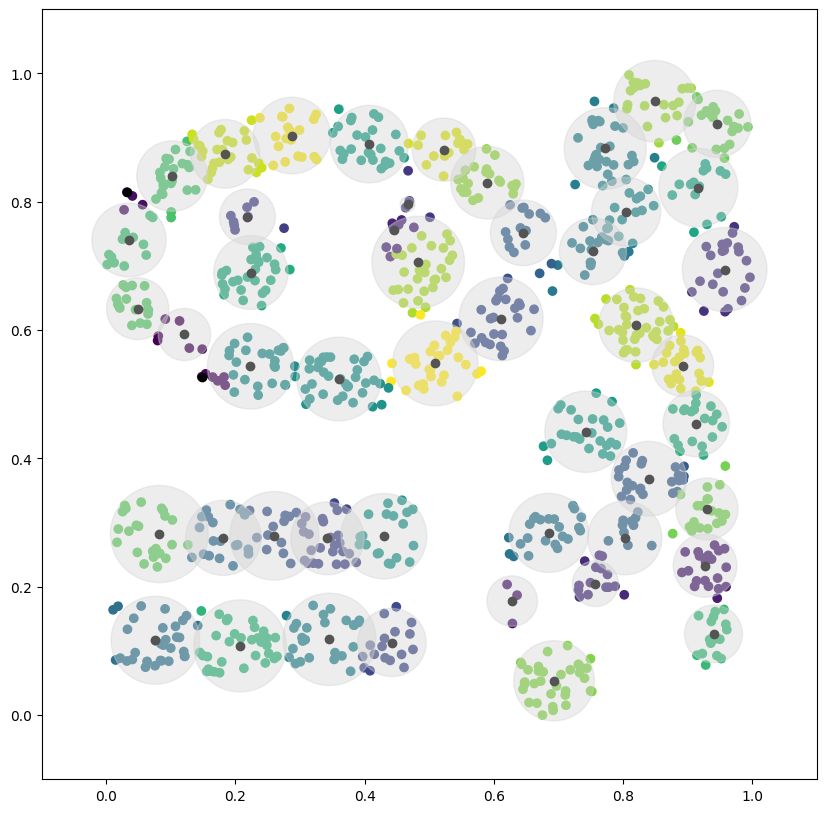

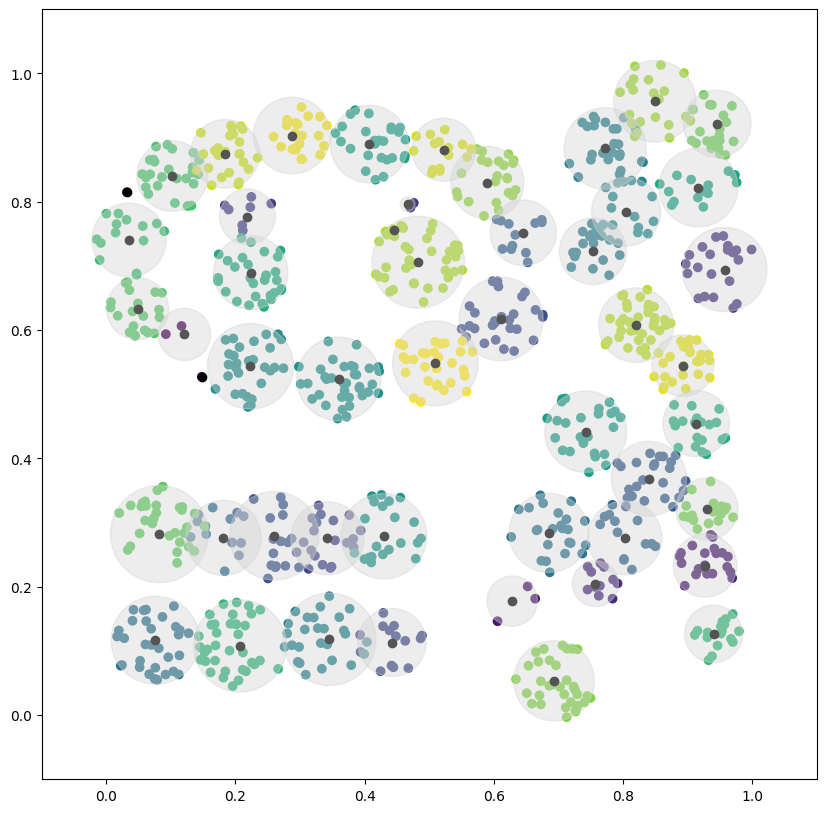

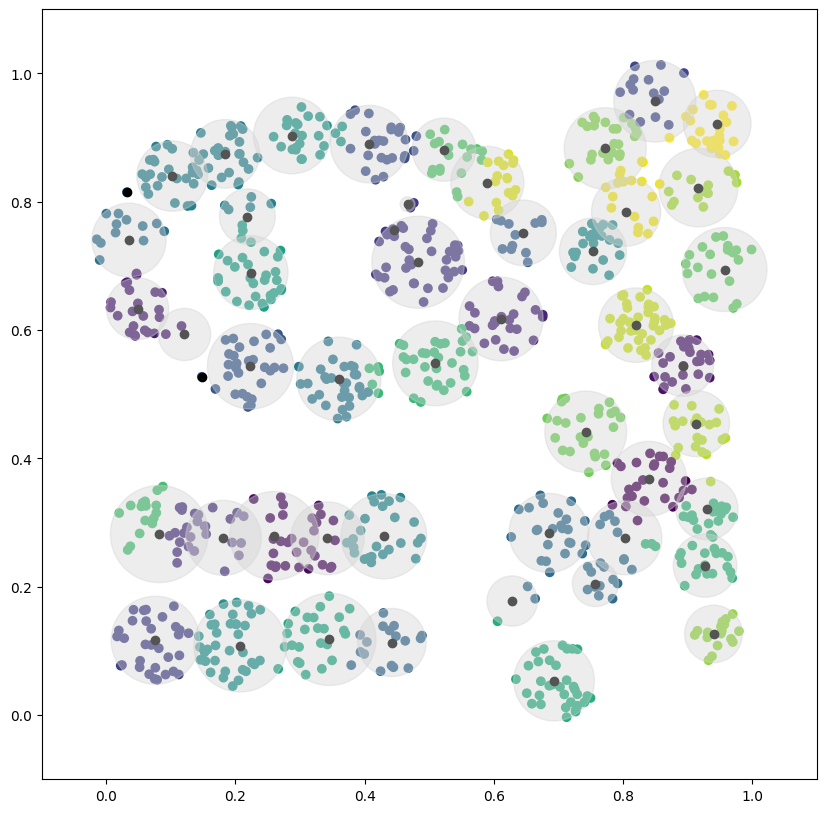

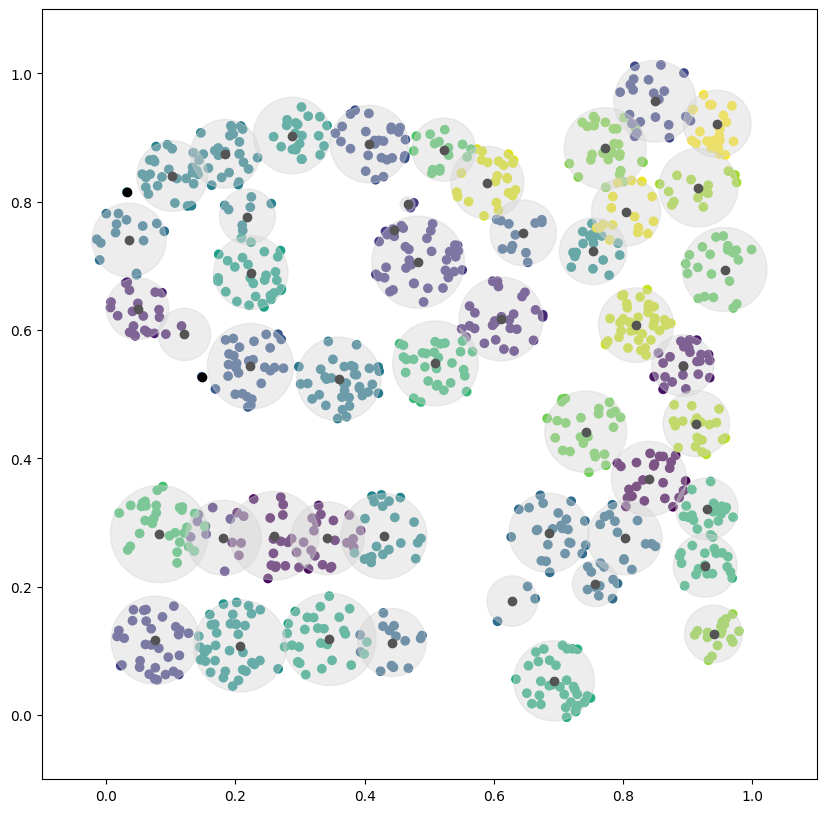

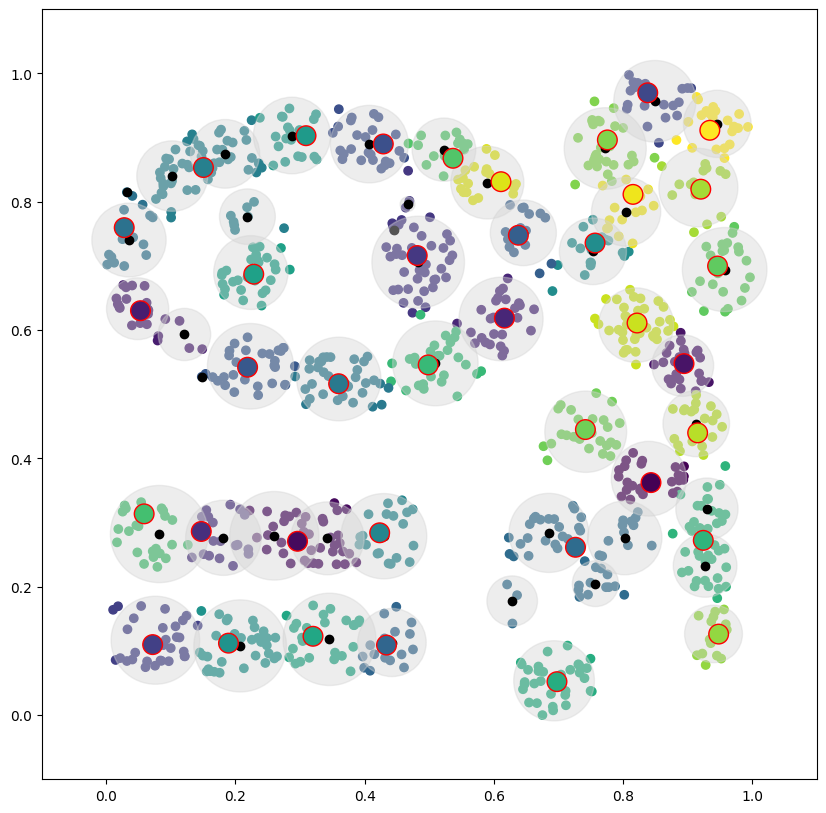

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37  
 0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   22    0    0    0    3    0    0    0    0    0  
 1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    8    0    0    0    0   28    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 2    0    0    0    0    0    0   40    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0  
 3    0    0    0    0    0    0    0    0    0    0    0    0    0   26    0    0    0    0    0    0    0    0    0   33    0    0    0    0    0    0    0    0    0    0    0    0    0    0  
 4   15    0    0    0   

In [6]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, sigma=0.5, mu=0.5, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="XMeans")
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
clustream_centers = genclustream.centers
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

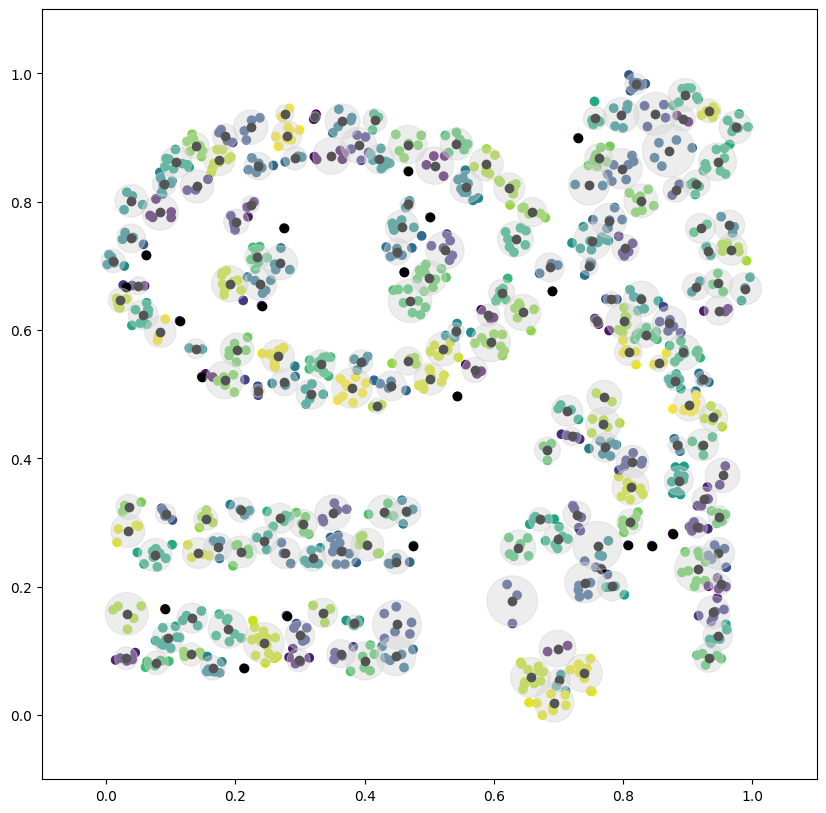

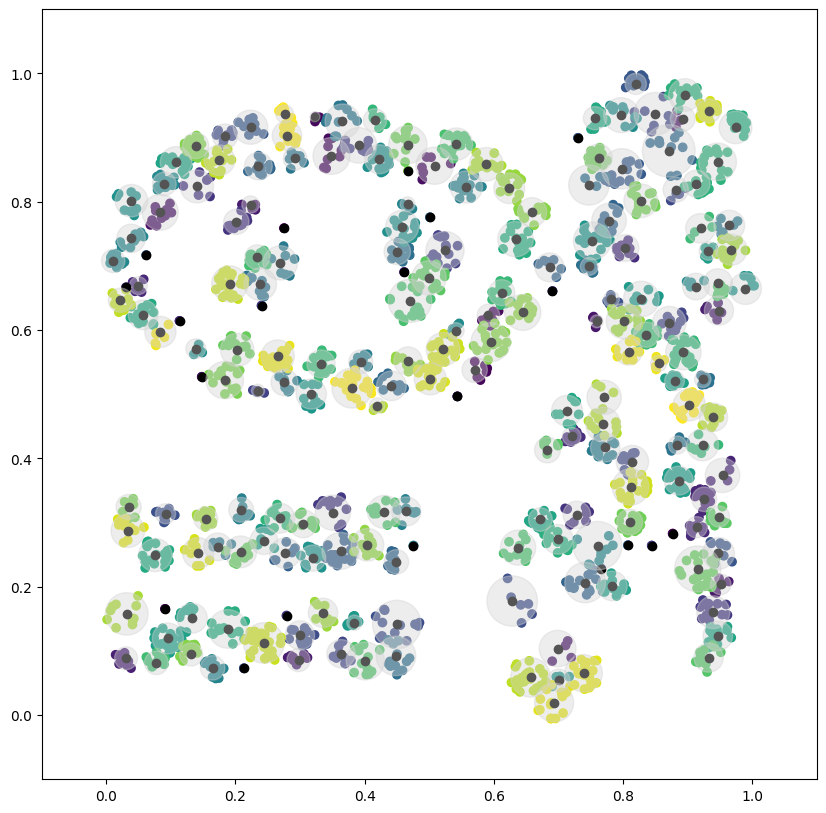

{'min_cluster_size': 50, 'rho': 1.2, 'beta': 0.2, 'seed': 0}


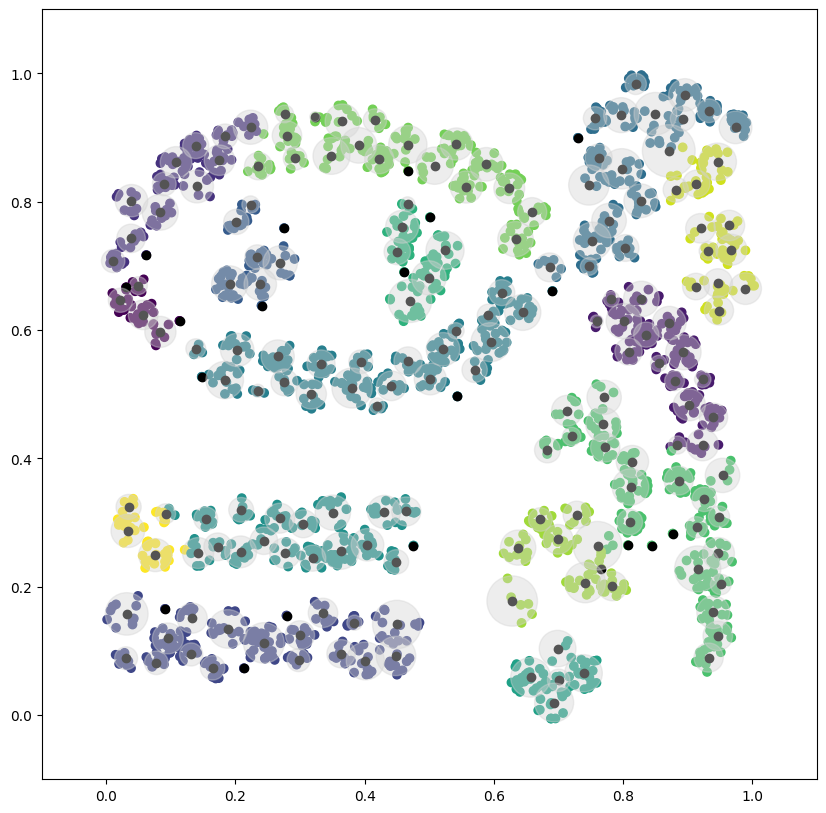

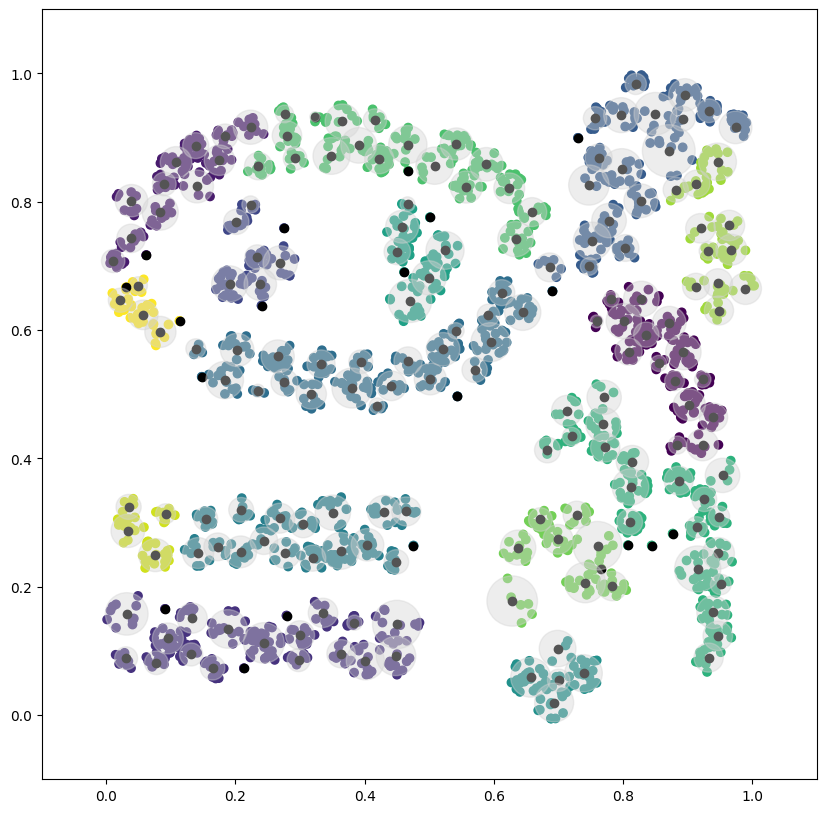

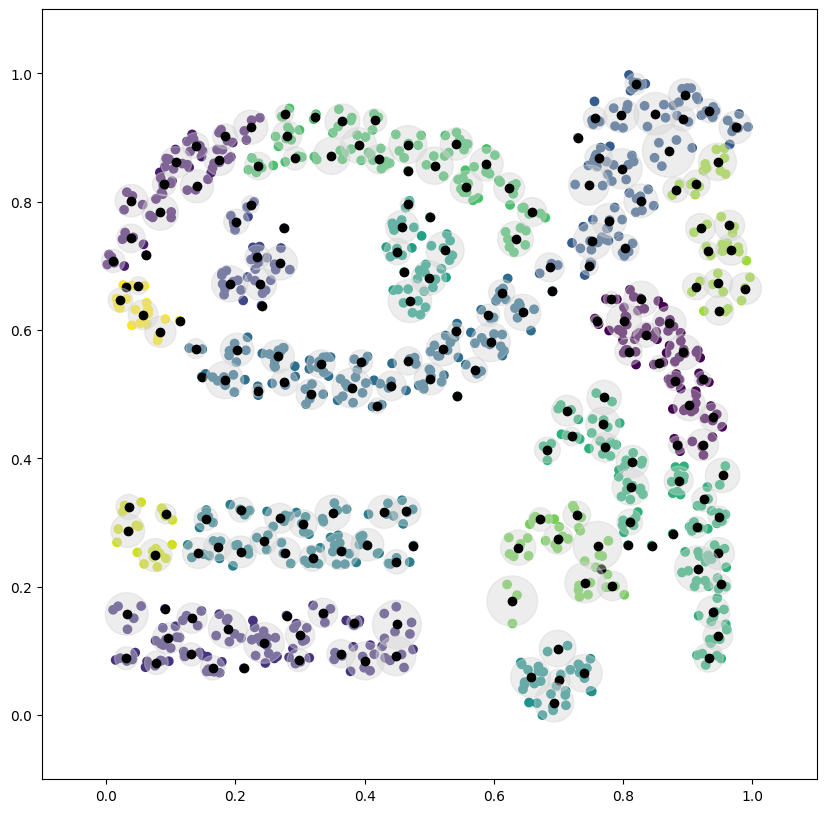

     0    1    2     3    4     5     6    7    8    9    10   11   12   13   14  
 0    0    0     0    0     0     0    0    0    0    0    0    0   25    0    0  
 1    0    0     0   36     0     0    0    0    0    0    0    0    0    0    0  
 2    0    0     0    0     0     0    0    0   41    0    0    0    0    0    0  
 3    0    0     0    0     0     0    0   33    0    0    0   26    0    0    0  
 4    0    0     0    0     0     0    0    0    0   50    0   16    0    0    0  
 5    0    0     0    0     0     0   77    0    0    0    0    0    0   23    0  
 6    0   62     0    0     3   122    0    0    0    0   99    0    0    0   21  
 7    0    0   108    0     0     0    0    0    0    0    0    0    0    0    0  
 8   80    0     0    0   100     0    0    0    0   64    0    0   14    0    0  
 9    0    0     0    0     0     0    0    0    0    0    0    0    0    0    0  
10    0    0     0    0     0     0    0    0    0    0    0    0    0    0    0  
11  

In [19]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=200, seed=0, time_gap=10000, offline_datascale=2000, offline_algo="DBHD", offline_args={"min_cluster_size":50, "rho":1.2, "beta": 0.2})
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

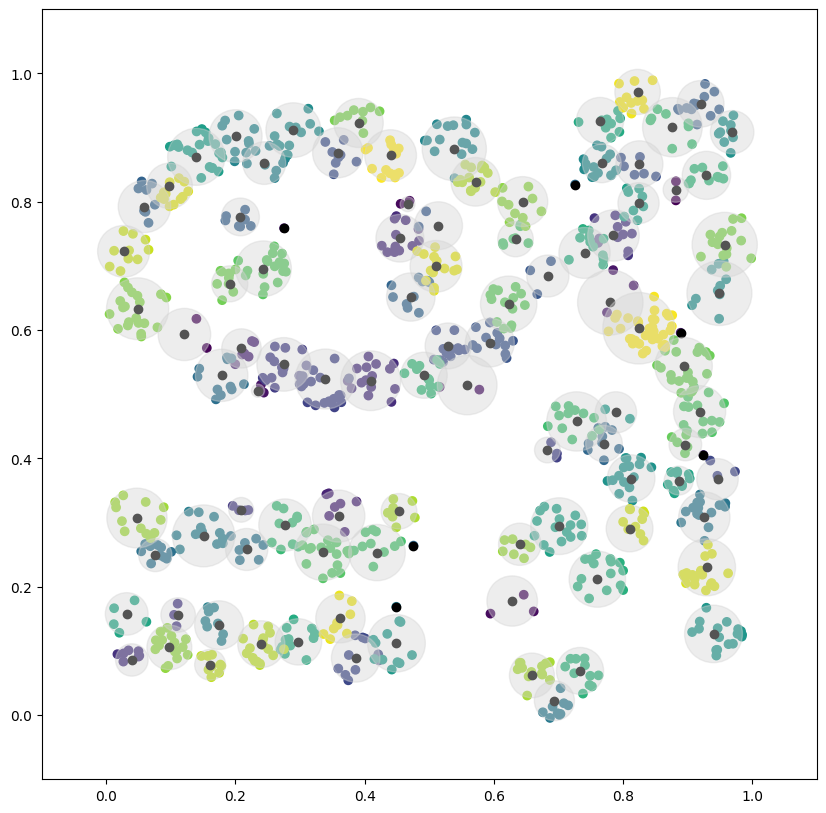

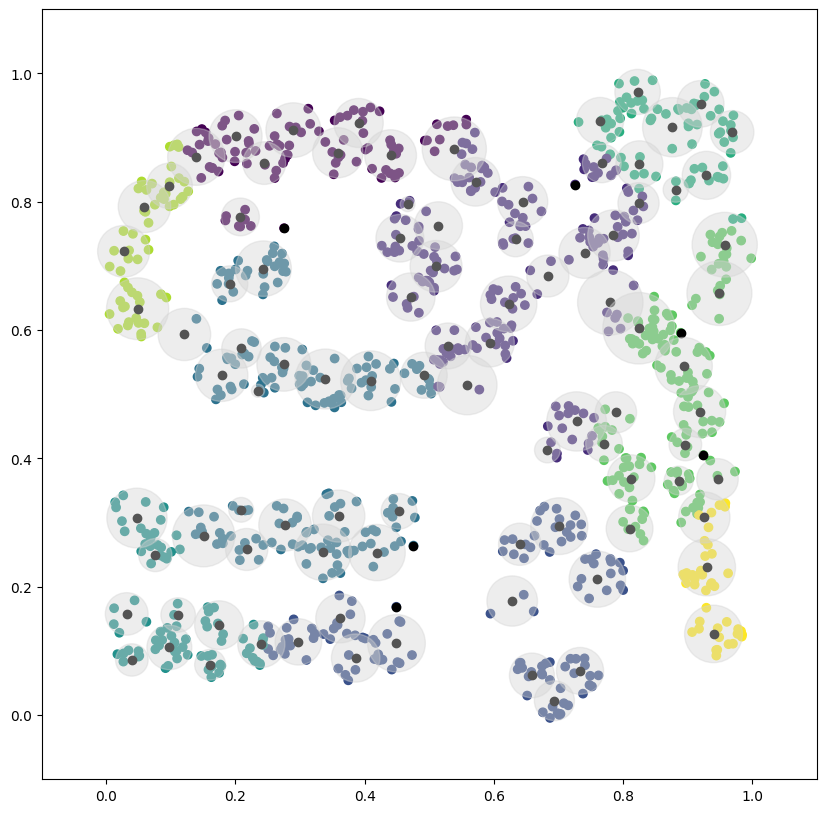

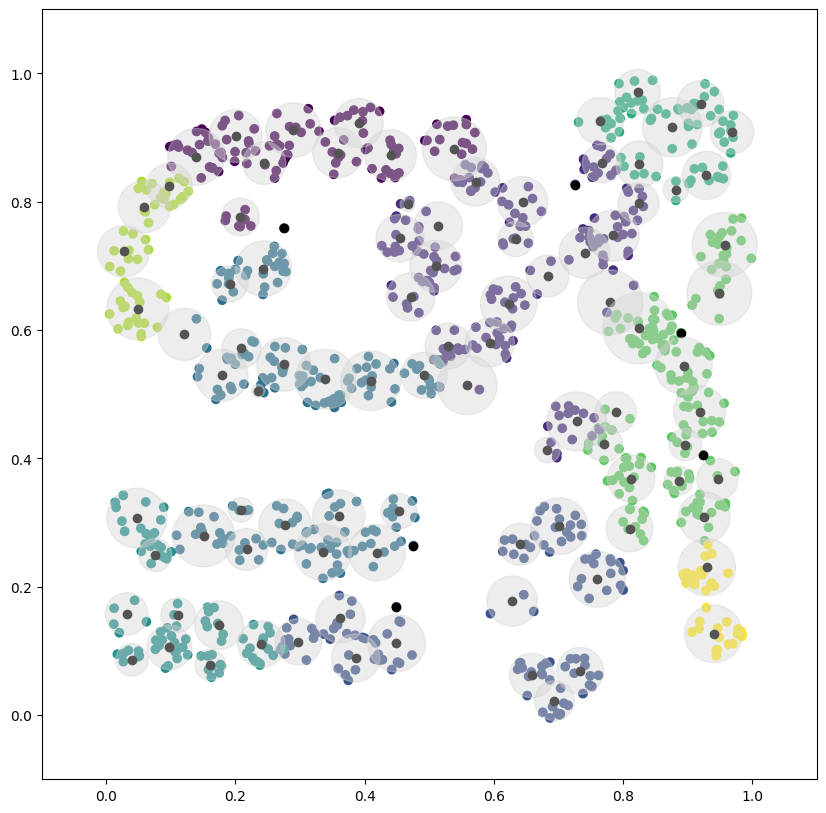

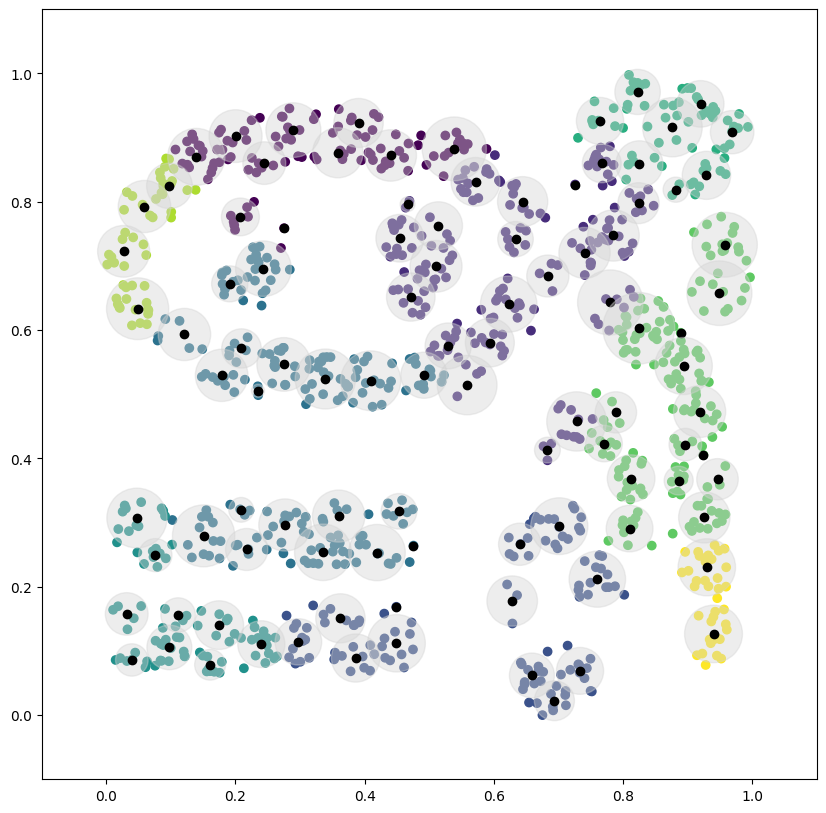

    0    1    2    3    4    5    6     7    8   
0    0    0    0    0    0    0    25    0    0  
1    9    0    0   27    0    0     0    0    0  
2    0   41    0    0    0    0     0    0    0  
3    0    0   59    0    0    0     0    0    0  
4    0   13   15    0    0    0    38    0    0  
5    0    0    0   78   22    0     0    0    0  
6   95   77    0   85    0    0     0   50    0  
7    0    0   43    0   65    0     0    0    0  
8    0   53    0    0    0   69   100    0   36  
Acc: 0.445 NMI: 0.5610002282833242 ARI: 0.2700247128708808 AMI: 0.5533389581915974 Pur.: 0.636 Prec.: 0.4672728341020594 Rec.: 0.3297912044620457 F1: 0.38667525647882534 Comp.: 0.5334882075175396 Fowl.: 0.39255887554723795 Homo.: 0.5915041340683469 Clu.Num.: 9 True Clu.Num 9


In [24]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="Spectral")
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))

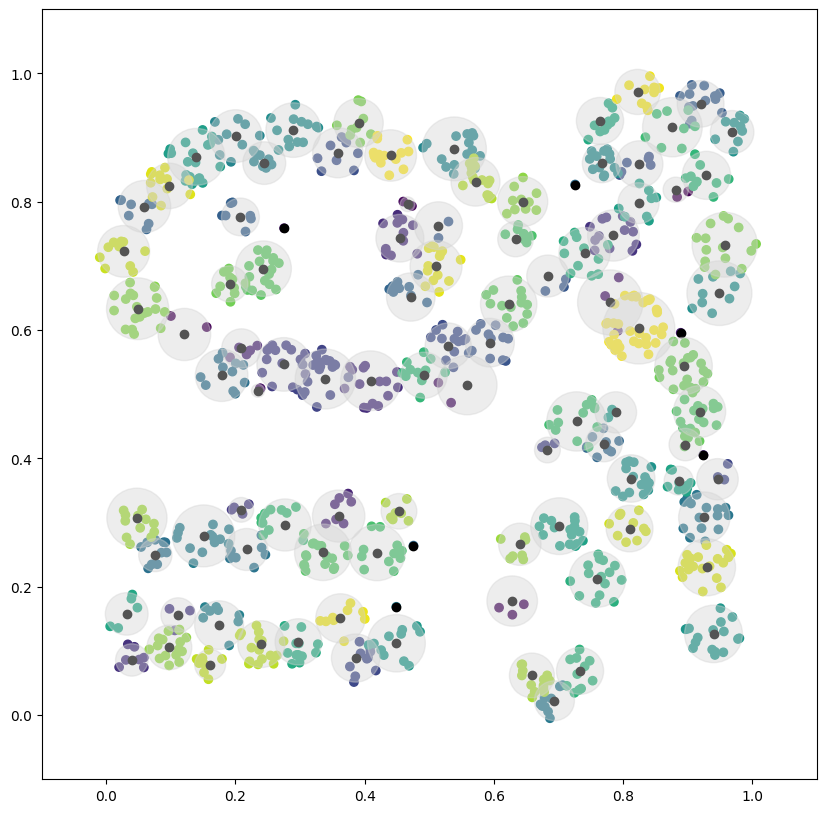

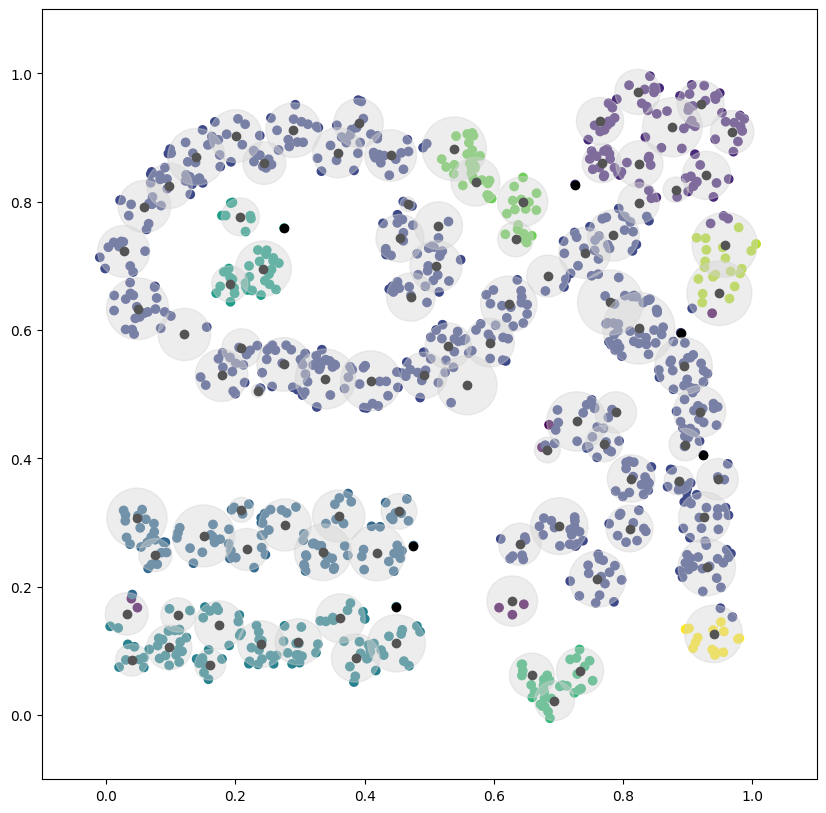

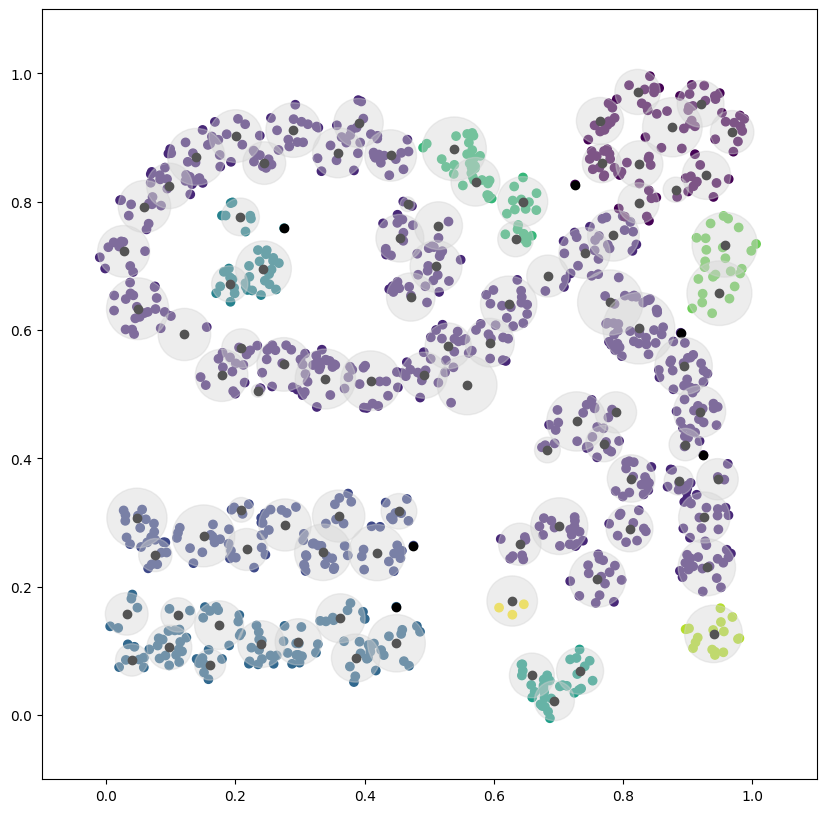

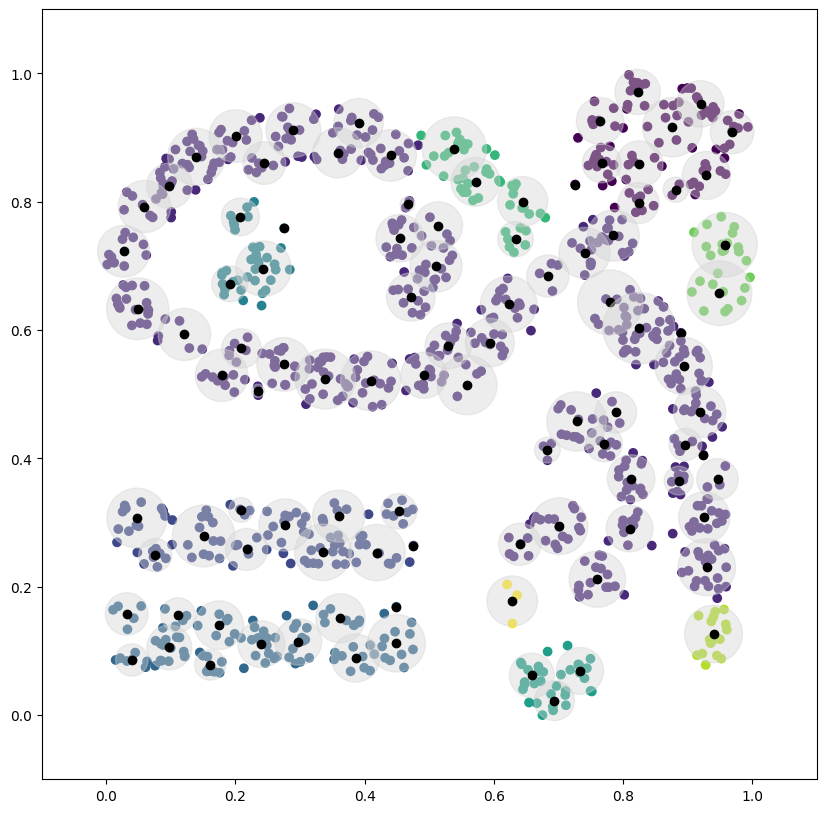

    0    1     2     3     4    5    6    7    8    9  
0    0     0     0     0    0    0    0   25    0   0  
1    0     0     0     0   36    0    0    0    0   0  
2    0    41     0     0    0    0    0    0    0   0  
3    0    23     0     0    0   33    0    0    0   3  
4    0    66     0     0    0    0    0    0    0   0  
5    0     0   100     0    0    0    0    0    0   0  
6    0   260     0     0    0    0   47    0    0   0  
7    0     0     0   108    0    0    0    0    0   0  
8   91   151     0     0    0    0    0    0   16   0  
9    0     0     0     0    0    0    0    0    0   0  
Acc: 0.653 NMI: 0.6801397620927608 ARI: 0.3466080003383813 AMI: 0.6729487348263127 Pur.: 0.719 Prec.: 0.4016875057320167 Rec.: 0.6811047295195837 F1: 0.5053439635710523 Comp.: 0.7448025302824666 Fowl.: 0.5230595185473652 Homo.: 0.6258079459471946 Clu.Num.: 10 True Clu.Num 9


In [27]:
from method.offlineHandler import GenCluStream
genclustream = GenCluStream(n_macro_clusters=9, max_micro_clusters=100, seed=0, time_gap=10000, offline_datascale=1000, offline_algo="DBSCAN", offline_args={"eps":0.05, "min_samples":10})
for x in X:
	dp = dict(enumerate(x))
	genclustream.learn_one(dp)
genclustream_labels_train = []
for x in X:
	dp = dict(enumerate(x))
	pred = genclustream.predict_one(dp)
	genclustream_labels_train.append(pred)
    
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=genclustream_labels_train)
for id, mc in genclustream.micro_clusters.items():
    mccenter = dict_to_np(mc.center)
    mc_patch = ptc.Circle((float(mccenter[0]), float(mccenter[1])), mc.radius(2), alpha=0.4, color="lightgrey")
    plt.gca().add_patch(mc_patch)
    plt.scatter(float(mccenter[0]), float(mccenter[1]), c="black")
#plt.scatter(clustream_centers[:, 0], clustream_centers[:,1], c=range(len(clustream_centers)), s= 200, edgecolors='red')

plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()
    
print(printMetrics(y, genclustream_labels_train))